# Aufgabe 21 (Dritte Aufgabe auf dem Blatt) - Lineare Klassifikation mit Softmax

## Teilaufgabe a)

## Teilaufgabe b)

## Teilaufgabe c)

## Teilaufgabe d)

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [183]:
def indikator(i,j):
    if i == j:
        return True
    else:
        return False

Den Shit brauche ich nicht, das wird im Code so schon gemacht. Kann man aber wieder implementieren....

In [184]:
def softmax(X, W, b):
    '''Gives back a matrix. q[i,j] is the confidence that point X[i] belongs to the j-th class.'''
    scores = np.matmul(W, X) + b # quasi eine f-Matrix
    nenner = scores.sum(axis=0) # Summiere bitte entlang der Spalten
    q = scores/nenner
    return q


def getPredictions(q):
    '''Returns the predicted labels with q from softmax'''
    return np.argmax(q,axis=0)

In [393]:
class net:    
    def __init__(self):
        np.random.seed(0)
        self.W = np.random.randn(2,2)
        self.b = np.zeros((2,1))
    
    def getPredictions(self, X):
        scores = np.dot(self.W, X) + self.b 
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
        return np.argmax(probs,axis=0)
    
    def train(self, X, labels, stepsize, epochs):
        m = X.shape[1]
        for i in range(epochs):
            scores = np.dot(self.W, X) + self.b 
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # [N x K]
            # compute the loss: average cross-entropy loss and regularization
            correct_logprobs = -np.log(probs)
            loss = np.sum(correct_logprobs)/m
            # compute the gradient on scores
            dscores = probs
            for column in range(0,m):
                if labels[column] == 0:
                    dscores[0,column] -= 1
                else:
                    dscores[1,column] -= 1
            dscores /= m
            # backpropate the gradient to the parameters (W,b)
            dW = np.dot(dscores, X.T)
            db = np.sum(dscores, axis=1, keepdims=True)
            # perform a parameter update
            self.W += -h * dW
            self.b += -h * db
        #a

In [394]:
df_P_0 = pd.read_hdf('populationen.hdf5', key = 'P_0')
P_0 = df_P_0.values
df_P_1 = pd.read_hdf('populationen.hdf5', key = 'P_1')
P_1 = df_P_1.values
P = np.concatenate((P_0,P_1))
P = np.transpose(P)
labels = np.concatenate((np.zeros(P_0.shape[0]),np.ones(P_1.shape[0])))

testnet = net()
testnet.train(P, labels, stepsize = 0.5, epochs = 100)

f(x)= 0.833059889648 x+ [ 0.42652373]


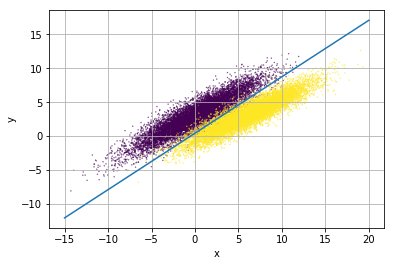

In [416]:
W = testnet.W
b = testnet.b
m = (W[1,0]-W[0,0])/(W[0,1]-W[1,1])
n = (b[1]-b[0])/(W[0,1]-W[1,1])
print('f(x)=',m,'x+',n)

x, y = zip(*np.transpose(P)) # Nicht nachfragen wie das funktioniert, bitte...
xlin = np.linspace(-15,20,1000)
plt.scatter(x, y, s=0.1, c= labels)
plt.plot(xlin, m*xlin+n)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

f(x)= 0.833059889648 x+ [ 0.42652373]
